In [51]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
def read_images(init_path):
    images, labels = [], []
    for i in os.listdir(init_path):
        for j in os.listdir(os.path.join(init_path, i)):
            image = os.path.join(init_path, i, j)
            img = cv2.imread(image)
            if img is None:
                print('Wrong path')
            else:
                resized_img = cv2.resize(img, (80, 80))
                scaled_img = resized_img / 255
                images.append(scaled_img)
                labels.append(i)
    return images, labels

In [3]:
def dataset_information(init_path, images):
    print('Number of images in the dataset:', len(images))
    print('==================================================')
    print('Number of classes in the dataset:', len(os.listdir(init_path)))
    print('==================================================')
    print('Type of classes in the dataset:', os.listdir(init_path))
    print('==================================================')
    for i in os.listdir('Skin Cancer'):
        print('Number of images in the', i, 'class is:', len(os.listdir(os.path.join(init_path, i))))
        print('==================================================')
    b1, b2 = [], []
    for i in os.listdir(init_path):
        b1.append(len(os.listdir((os.path.join(init_path, i)))))
        b2.append(i)
    plt.figure(figsize = (9, 7))
    plt.bar(b2, b1)
    plt.title('Number of images in the dataset', fontsize = 20)
    plt.ylabel('Counts', fontsize = 15)
    plt.show()

In [4]:
def read_information(init_path):
    images, labels = read_images(init_path)
    dataset_information(init_path, images)
    return images, labels

Number of images in the dataset: 13879
Number of classes in the dataset: 2
Type of classes in the dataset: ['Benign', 'Malignant']
Number of images in the Benign class is: 7289
Number of images in the Malignant class is: 6590


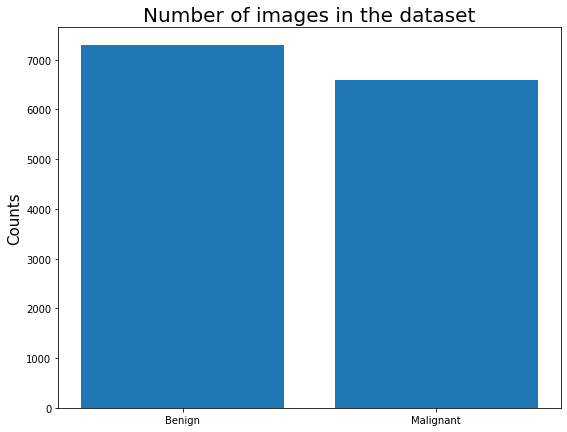

In [5]:
images, labels = read_information('Skin Cancer')

In [6]:
images, labels = shuffle(images, labels)

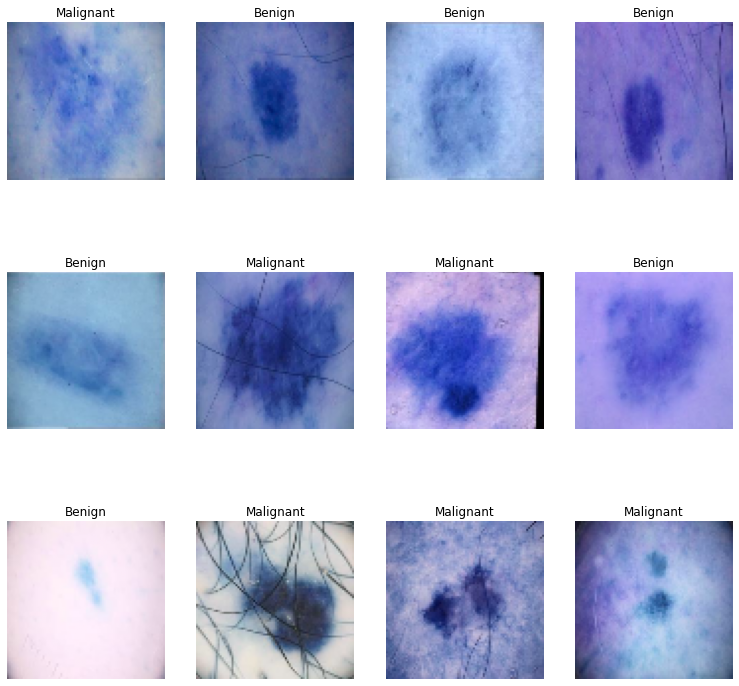

In [7]:
plt.figure(figsize = (13, 13))
for i in range(0, 12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

In [8]:
le = LabelEncoder()
y = le.fit_transform(labels)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size = 0.2, random_state = 101, stratify = y, 
                                                   shuffle = True)

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [11]:
print('Size of train dataset:', len(X_train))
print('Size of test dataset:', len(X_test))

Size of train dataset: 11103
Size of test dataset: 2776


In [30]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 4)

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (80, 80, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [33]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 80, 80, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 40, 40, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 20, 20, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,297 (458.19 KB)

 Trainable params: 117,297 (458.19 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [35]:
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 89ms/step - accuracy: 0.7024 - loss: 0.5485 - val_accuracy: 0.8191 - val_loss: 0.3881
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.8365 - loss: 0.3681 - val_accuracy: 0.8632 - val_loss: 0.3192
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.8561 - loss: 0.3354 - val_accuracy: 0.8776 - val_loss: 0.3202
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.8562 - loss: 0.3241 - val_accuracy: 0.8686 - val_loss: 0.3362
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.8669 - loss: 0.3049 - val_accuracy: 0.8686 - val_loss: 0.2867
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.8761 - loss: 0.2907 - val_accuracy: 0.8749 - val_loss: 0.2886
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.8857 - loss: 0.2726 - val_accuracy: 0.8803 - val_loss: 0.2951
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.8854 - loss: 0

In [43]:
model.evaluate(X_test, y_test)

87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8837 - loss: 0.2982


[0.3028925657272339, 0.8811239004135132]

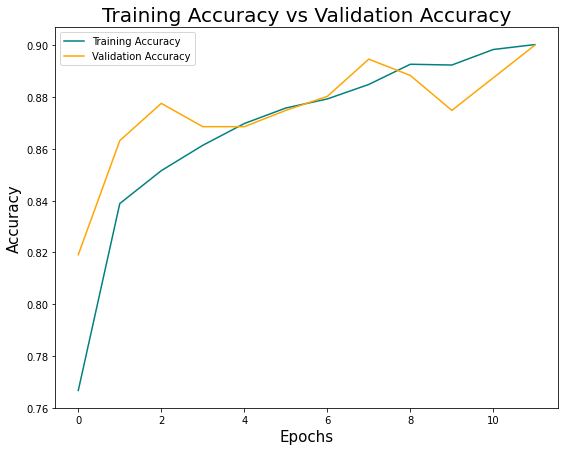

In [44]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy', fontsize = 20)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()

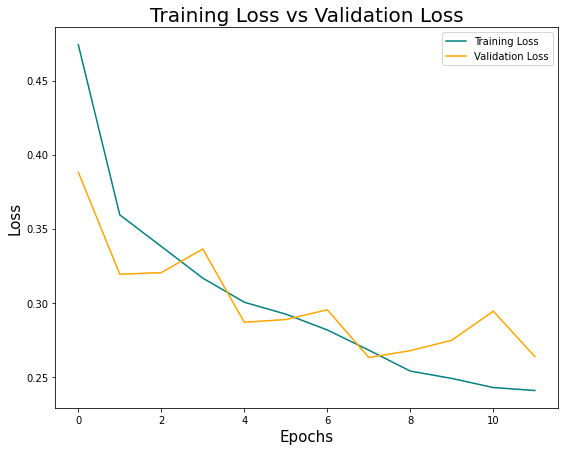

In [45]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss', fontsize = 20)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend()
plt.show()

In [46]:
y_p = model.predict(X_test)
y_p[:10]

87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


array([[0.6439754 ],
       [0.30732164],
       [0.999463  ],
       [0.42638204],
       [0.9978217 ],
       [0.7480658 ],
       [0.9370072 ],
       [0.9997674 ],
       [0.9999153 ],
       [0.00540191]], dtype=float32)

In [50]:
y_pred = np.where(y_p > 0.5, 1, 0)
y_pred[:10]

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1458
           1       0.85      0.92      0.88      1318

    accuracy                           0.88      2776
   macro avg       0.88      0.88      0.88      2776
weighted avg       0.88      0.88      0.88      2776



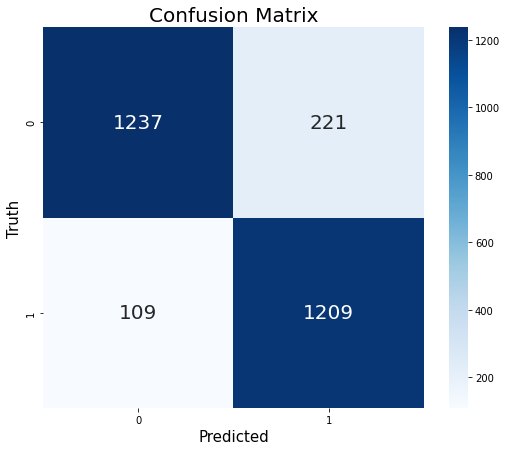

In [53]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 20}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Truth', fontsize = 15)
plt.show()